In [1]:
%load_ext watermark
%watermark

Last updated: 2021-08-13T11:56:02.302504+01:00

Python implementation: CPython
Python version       : 3.9.4
IPython version      : 7.23.1

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.4.0-80-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



### Cargamos el dataset

In [1]:
import pandas as pd
df = pd.read_csv("boston_dataset.csv")

df = df.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "ZN":"PCT_ZONA_RESIDENCIAL",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS":"RIO_CHARLES",
    "NOX":"OXIDO_NITROSO_PPM",
    "RM":"N_HABITACIONES_MEDIO",
    "AGE":"PCT_CASAS_40S",
    "DIS_EMPLEO":"DISTANCIA_CENTRO_EMPLEO",
    "RAD":"DIS_AUTOPISTAS",
    "TAX":"CARGA_FISCAL",
    "PTRATIO":"RATIO_PROFESORES",
    "B":"PCT_NEGRA",
    "MEDV":"VALOR_MEDIANO",
    "LSTAT":"PCT_CLASE_BAJA"
})

df.head()

,CIUDAD,LON,LAT,VALOR_MEDIANO,INDICE_CRIMEN,PCT_ZONA_RESIDENCIAL,PCT_ZONA_INDUSTRIAL,RIO_CHARLES,OXIDO_NITROSO_PPM,N_HABITACIONES_MEDIO,PCT_CASAS_40S,DIS,DIS_AUTOPISTAS,CARGA_FISCAL,RATIO_PROFESORES,PCT_NEGRA,PCT_CLASE_BAJA
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### Customizar plots 

In [3]:
%matplotlib notebook

In [4]:
import matplotlib.pyplot as plt

Podemos especificar el tamaño del gráfico con el parámetro figsize


<IPython.core.display.Javascript object>


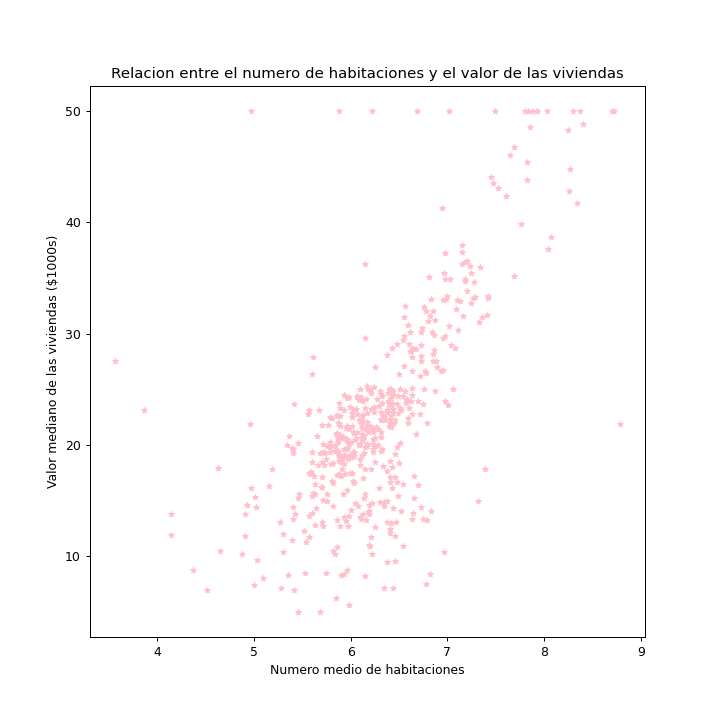

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

In [6]:
df.plot(kind="scatter", x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*",
        color="pink", figsize=(8,8))

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

Alternativamente, podemos configurar el tamaño de los plots a nivel global cambiando los parametros de matplotlib

In [7]:
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (8,8)

<IPython.core.display.Javascript object>


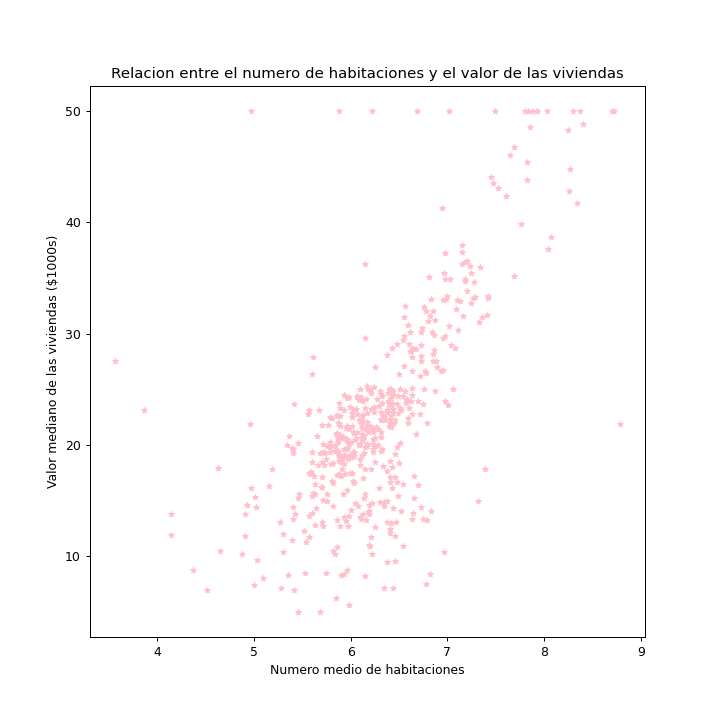

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

In [8]:
df.plot(kind="scatter", x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", marker="*", color="pink")

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

### Estilos

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [10]:
# cambiamos el estilo para todos los futuros graficos
plt.style.use("fivethirtyeight")

<IPython.core.display.Javascript object>


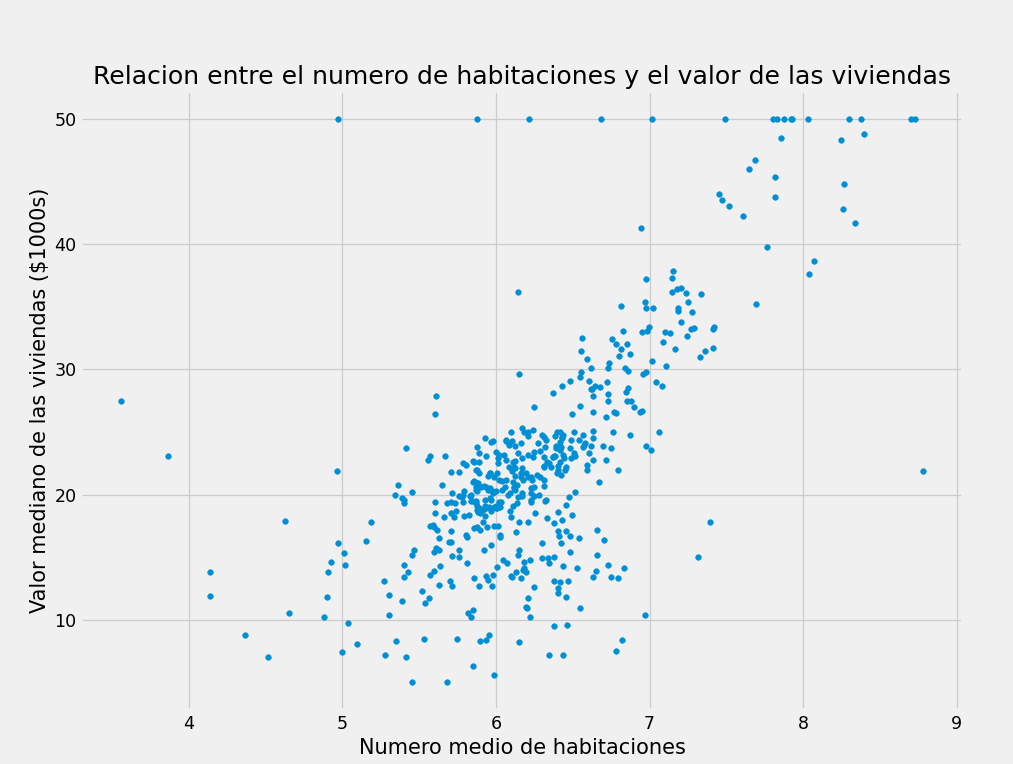

Text(0, 0.5, 'Valor mediano de las viviendas ($1000s)')

In [11]:
df.plot(kind="scatter", x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO")

plt.title("Relacion entre el numero de habitaciones y el valor de las viviendas")

plt.xlabel("Numero medio de habitaciones")

plt.ylabel("Valor mediano de las viviendas ($1000s)")

---
### Interact

ipywidgets es un addon para jupyter que permite embeber widgets de html interactivos en el notebook

Se instala con:

`conda install -c conda-forge ipywidgets`

Para que esto funcione tenemos que tener el canal [conda-forge](https://conda-forge.github.io) habilitado.

[Aquí](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) hay un tutorial que explica como usar interact

In [12]:
from ipywidgets import interact

In [13]:
@interact(col1=df.columns.tolist())
def grafico_variable(col1):
    df.plot.scatter(x=col1, y="VALOR_MEDIANO")
    plt.title("{} vs VALOR_MEDIANO".format(col1))

interactive(children=(Dropdown(description='col1', options=('CIUDAD', 'LON', 'LAT', 'VALOR_MEDIANO', 'INDICE_C…

---
### Mapas

In [35]:
%matplotlib inline

<AxesSubplot:xlabel='LON', ylabel='LAT'>

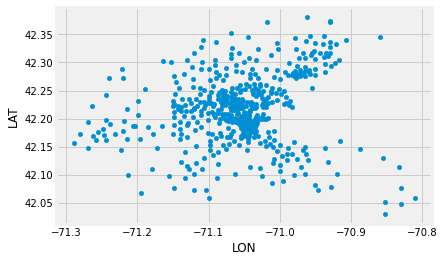

In [36]:
df.plot(kind="scatter", x="LON", y="LAT")

Usaremos [cartopy](https://scitools.org.uk/cartopy/docs/latest/) para hacer el mapa, ya que es relativamente sencillo.


Hay mas librerías en python para hacer mapas, si quereis hacer mapas mas elaborados una librería que me gusta es [Folium](http://python-visualization.github.io/folium/).


Para instalar cartopy(desde terminal): 

`!conda install -y -c conda-forge cartopy`

In [6]:
import cartopy.crs as ccrs
from cartopy.io import img_tiles

In [15]:
%matplotlib inline

<AxesSubplot:ylabel='Density'>

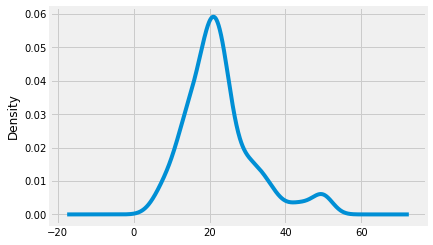

In [16]:
df.VALOR_MEDIANO.plot(kind="kde");

In [3]:
primer_quintil = df.VALOR_MEDIANO.quantile(0.2)
primer_quintil

15.3

In [4]:
cuarto_quintil = df.VALOR_MEDIANO.quantile(0.8)
cuarto_quintil

28.2

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


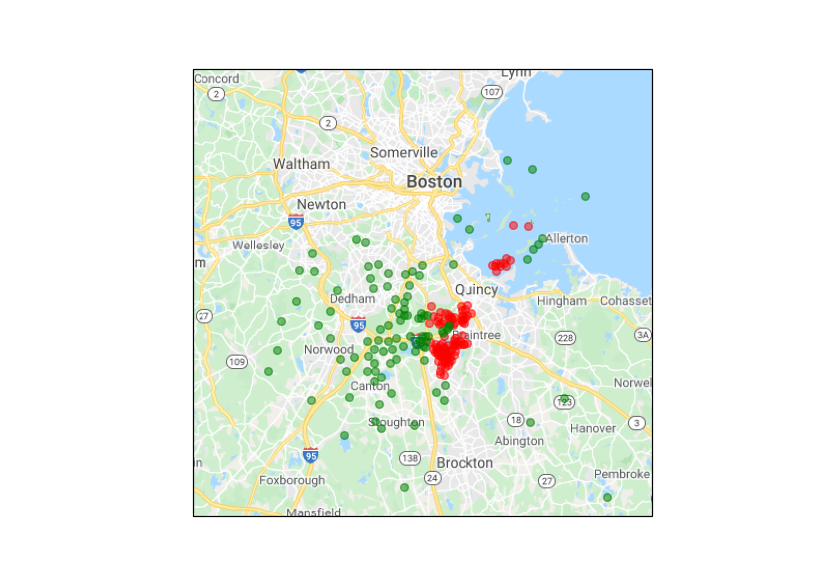

In [9]:
imagery = img_tiles.GoogleTiles()

ax = plt.axes(projection=imagery.crs)

#x0, x1, y0, y1
limites_mapa = (-71.38 ,-70.77,42.03 , 42.47)
ax.set_extent(limites_mapa)

ax.add_image(imagery, 10)
df_primer_qt = df[df.VALOR_MEDIANO<primer_quintil]
df_ultimo_qt = df[df.VALOR_MEDIANO>cuarto_quintil]

plt.plot(df_primer_qt.LON, df_primer_qt.LAT, transform=ccrs.Geodetic(), 
         marker='.', markersize=10, color="red",  linewidth=0, alpha=0.5)

plt.plot(df_ultimo_qt.LON, df_ultimo_qt.LAT, transform=ccrs.Geodetic(),
         marker='.', markersize=10, color="green",  linewidth=0, alpha=0.5)

plt.show()

In [10]:
%matplotlib inline

---

### Otras librerias recomendadas

### [Seaborn](https://seaborn.pydata.org)

### Seaborn

Una de las principales ventajas de seaborn es que permiten hacer graficos cientificos "estandar" de forma facil. [Aquí](http://seaborn.pydata.org/examples/index.html) hay una galeria con ejemplos de gráficos hechos con seaborn.

In [19]:
import seaborn as sns
sns.__version__

'0.11.1'

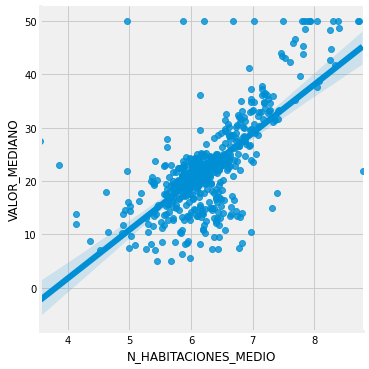

In [20]:
sns.lmplot(x="N_HABITACIONES_MEDIO", y="VALOR_MEDIANO", data=df)

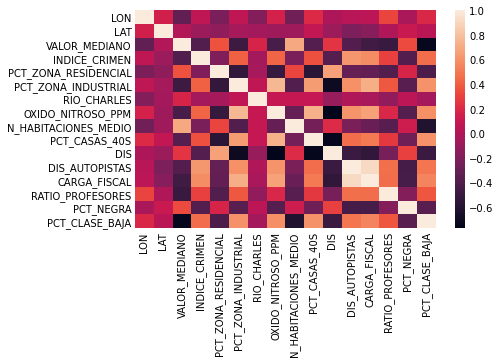

In [21]:
sns.heatmap(df.corr());

---

### Bokeh

Bokeh es una libreria imperativa, lo que significa es que le decimos a Bokeh exactamente todo lo que tiene que hacer y bokeh lo implementa. 

Lo bueno de esto es que permite un mayor control y flexibilidad para configurar graficos. Lo malo es que para el 99% de los casos no se necesita esto.

Para instalar:

`conda install bokeh`

In [22]:
import bokeh.plotting as bk

bk.output_notebook()

Loading BokehJS ...

In [23]:
df.INDICE_CRIMEN

0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
        ...   
501    0.06263
502    0.04527
503    0.06076
504    0.10959
505    0.04741
Name: INDICE_CRIMEN, Length: 506, dtype: float64

In [24]:
df["CRIMEN_QUINTIL"] = pd.qcut(df.INDICE_CRIMEN, 5)

In [25]:
df.CRIMEN_QUINTIL.cat.categories

IntervalIndex([(0.00532, 0.0642], (0.0642, 0.15], (0.15, 0.55], (0.55, 5.581], (5.581, 88.976]],
              closed='right',
              dtype='interval[float64]')

In [26]:
from bokeh.palettes import brewer

colors = brewer["Spectral"][len(df.CRIMEN_QUINTIL.unique())]
colors

('#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c')

<div style="color:blue" class="alert alert-block alert-warning">
<b>Actualizacion Mayo 2021:</b> "legend" se ha renombrado a "legend_label".
</div>

In [27]:
p = bk.figure(
plot_width=600,
    plot_height=600,
    title="Habitaciones vs Valor vivienda vs crimen"
)

for i, quintil in enumerate(df.CRIMEN_QUINTIL.cat.categories):
    df_q = df[df.CRIMEN_QUINTIL==quintil]
    p.scatter(df_q.N_HABITACIONES_MEDIO, df_q.VALOR_MEDIANO, color=colors[i],
             legend_label="({}-{})".format(quintil.left, quintil.right)
             )
    
bk.show(p);

In [28]:
import numpy as np

hist, edges = np.histogram(df.VALOR_MEDIANO, bins=20)

In [29]:
hist

array([ 9, 12, 18, 36, 41, 41, 84, 71, 72, 12, 23, 18, 17, 14,  6,  1,  5,
        5,  2, 19])

In [30]:
edges

array([ 5.  ,  7.25,  9.5 , 11.75, 14.  , 16.25, 18.5 , 20.75, 23.  ,
       25.25, 27.5 , 29.75, 32.  , 34.25, 36.5 , 38.75, 41.  , 43.25,
       45.5 , 47.75, 50.  ])

In [31]:
p1 = bk.figure(title="Histograma valor viviendas", tools="save,hover", background_fill_color="#E8DDCB")



p1.quad(top=hist,bottom=0, left=edges[:-1], right=edges[1:], fill_color="#026560")

bk.show(p1)

---

### [Altair](https://altair-viz.github.io/)

Altair es lo que se llama una libreria declarativa, decimos lo que queremos que ocurra y altair ya se apaña por su cuenta para hacerlo realidad.

In [32]:
from altair import Chart, Color, Scale

<div style="color:blue" class="alert alert-block alert-warning">
<b>Actualizacion Mayo 2021:</b> Altair ha cambiado como interpreta los  datos tipo interval (como cuantiles)
    Ahora hay que convertir la columna en string (texto) antes de usarla para aplicar el color
</div>

In [33]:
# convertimos la columna de cuantiles en texto
df['CRIMEN_QUINTIL_STR'] = df.CRIMEN_QUINTIL.astype(str)

In [34]:
chart = Chart(df[['N_HABITACIONES_MEDIO','VALOR_MEDIANO','CRIMEN_QUINTIL_STR']])

scale = Scale(range=['#996666', '#b34d4d', '#cc3333','#e61919','#ff0000'], type='ordinal')

chart.mark_point().encode(
    x="N_HABITACIONES_MEDIO",
    y="VALOR_MEDIANO",
    color=Color("CRIMEN_QUINTIL_STR", scale=scale)

)

alt.Chart(...)